In [435]:
# import tp1-inpainting-etu

%matplotlib inline
from math import sqrt, log
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
import seaborn as sns

# Génération aléatoire

In [436]:
def gen_linear(a, b, eps, nbex):
    x = np.random.uniform(-5, 5, (nbex, len(a)))
    noise = np.random.normal(scale=eps, size=(nbex, 1))
    a = np.array(a)
    a= a.reshape(3,1)
    y = np.add(np.dot(x,a), noise)
    y = np.add(y, b)
    return x,y

In [437]:
# Parameters values
a = [1, 1, 1]
b = 5
eps_0 = 0.000001
n = 100


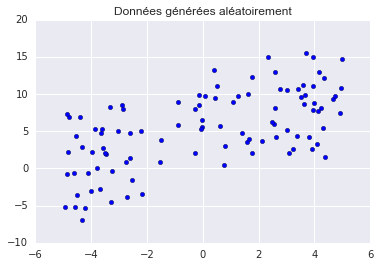

In [438]:
x, y = gen_linear(a, b, eps_0, n) 
plt.figure()
plt.scatter(x[:,0], y)
plt.title("Données générées aléatoirement")

# Données réelles : Boston Housing


In [439]:
def read_file (fn ):
    with open (fn) as f:
        names =f. readline ()
        X=np. array ([[ float (x) for x in l. strip (). split (" ")] 
                      for l in f. readlines ()])
    return X[: ,: -1] ,X[: , -1]. reshape ( -1)

In [440]:
df = read_file("housing.csv")

In [441]:
x_df, y_df = df[0], df[1]

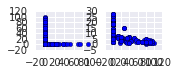

In [442]:
plt.figure ()
plt.subplot (5, 5, 1) #plt. subplot (rows ,cols ,idx)
plt.scatter (x_df[:, 0] , x_df[:,1])
plt.subplot (5 ,5 ,2)
plt.scatter (x_df[:, 1] , x_df[:,2])

On observe que certaines données sont extrêmement corrélées, et donc que certaines variables explicatives apportent vraisemblablement la même information

# Régression linéaire

Préambule:

On écrit $x^*$ le vecteur $(1, x)$ où x est un vecteur de taille d. $x^*$ est donc un vecteur de $R^{d+1}$.

On a donc aussitôt:
$$f_w(x) = w.x^*$$

De même, si l'on note $X$ la matrice $(x^*_1, ..., x^*_N)$ où $x^*_i$ est le vecteur i généralisé on obtient:
$$f_w(X) = X \times (w_0, w_1, ..., w_d) = X \times w$$

Calcul de l'erreur des moindres carrés:

Pour tout $x,y \in X,Y$ point de la base d'apprentissage:
$$l(y, f_w(x)) = (y - f_w(x))^2$$

Donc pour l'ensemble de la base d'apprentissage:
$$R = \frac{1}{N} \sum_1^N (y_i -f_w(x_i))^2$$
$$R = \frac{1}{N} (Y-X \times w)^2 $$

On peut remarquer que ce risque est fortement convexe. L'optimum $w$ est donc obtenu là où le gradient s'annule. Après calcul, on trouve l'estimateur des moindres carrés: 

$$w = (X^TX)^{-1}X^TY$$

In [463]:
def predict(w, X):
    return np.dot(w, X)  # A tester

def mse(yhat, y):
    """Renvoit l'erreur entre yhat et y"""
    assert(len(yhat) == len(y))
    n = len(yhat)
    return ((1/n)*(np.dot(np.transpose(y-yhat), (y-yhat))))[0][0]

def regress(X, Y):
    """Renvoit l'estimateur w_hat estimateur des moindres carrés
    en régression linéaire sur la base d'apprentissage (X, Y)"""
    mat_1 = np.linalg.pinv(np.dot(np.transpose(X), X))
    mat_2 = np.dot(np.transpose(X), Y)
    return np.dot(mat_1, mat_2)

In [464]:
# Données simulées
# Tout d'abord nous devons modifier x pour le rendre conforme a nos attentes
def resize(x):
    return np.hstack((np.ones(len(x)).reshape(-1, 1), x))

x_sim = resize(x)
print(x_sim[:4, :])  # Verifier que x_sim a la forme demandée
y_sim = y

[[ 1.         -3.68412453 -4.78786237  0.73212104]
 [ 1.         -3.03381525 -1.61430132  4.63560547]
 [ 1.         -0.13563729  2.96034609  2.08521416]
 [ 1.         -3.31861771  2.03260725  4.51431971]]


In [465]:
w_estim = regress(x_sim, y_sim)
print(w_estim)
# On s'apercoit que l'estimateur des moindres carrés est plutôt bon et est proche du résultat attendu 
print(mse(np.dot(x_sim, w_estim), y))

[[ 5.00000024]
 [ 1.00000001]
 [ 1.        ]
 [ 0.99999999]]
7.6136655738e-13


In [458]:
# Evolution du risque en fonction du nombre de points pour l'estimateur des moindres carrés
nbexs = [1+ i for i in range(2, 1000)]
risk = []
for n in nbexs:
    x_sim, y_sim = gen_linear(a, b, 1, n)
    x_sim = resize(x_sim)
    w_estim = regress(x_sim, y_sim)
    risk.append(mse(np.dot(x_sim, w_estim), y_sim))
    print(w_estim)
# plt.plot(nbexs, risk)

[[ 3.045453  ]
 [-1.73878091]
 [ 2.25520415]
 [ 1.17908112]]
[[ 6.93405174]
 [ 1.92096082]
 [ 1.02737692]
 [ 1.28601187]]
[[ 5.60856513]
 [ 0.71081604]
 [ 0.79133454]
 [ 0.81957839]]
[[ 6.03582664]
 [ 1.14045923]
 [ 1.49412239]
 [ 0.79673412]]
[[ 4.59776565]
 [ 1.03621535]
 [ 0.85146399]
 [ 1.01270955]]
[[ 4.59982119]
 [ 1.0833921 ]
 [ 0.91274914]
 [ 0.85789394]]
[[ 5.12132614]
 [ 0.9606577 ]
 [ 1.14369402]
 [ 0.74546608]]
[[ 5.46278321]
 [ 1.0833779 ]
 [ 1.06770676]
 [ 1.05327501]]
[[ 5.3783799 ]
 [ 1.05641914]
 [ 1.00397291]
 [ 1.12485101]]
[[ 5.19777439]
 [ 1.10635814]
 [ 0.87136565]
 [ 0.94568666]]
[[ 4.91603747]
 [ 0.91832316]
 [ 0.97940512]
 [ 1.06929335]]
[[ 4.79885105]
 [ 0.84972735]
 [ 1.134441  ]
 [ 1.14154484]]
[[ 5.15778168]
 [ 1.00518991]
 [ 0.95362157]
 [ 1.0804478 ]]
[[ 4.79134999]
 [ 0.93017666]
 [ 1.02184285]
 [ 0.75705312]]
[[ 5.01160476]
 [ 0.96405646]
 [ 0.9044136 ]
 [ 1.11891565]]
[[ 5.34468277]
 [ 1.15080407]
 [ 0.93989505]
 [ 0.82321626]]
[[ 4.56899071]
 [ 1.1003

In [ ]:
# Evolution du risque en fonction du nombre de points pour l'estimateur des moindres carrés
n = 1000
stds = [0.05*i for i in range(1, 50)]
risk = []
for std in stds:
    x_sim, y_sim = gen_linear(a, b, std, n)
    x_sim = resize(x_sim)
    w_estim = regress(x_sim, y_sim)
    risk.append(mse(np.dot(x_sim, w_estim), y_sim))
log_stds = [log(std) for std in stds]
plt.plot(log_stds, risk)

# SEMBLE Y AVOIR UN PROBLEME, A REGLER
PENSER A DES GRAPHES PLUS PERTINENTS

In [ ]:
# Test sur des données réelles
x_train = resize(x_df)
y_train = y_df
w = regress(x_train, y_train)
print(w)



Interprétation des poids :
On peut grossièrement supposer que si les variables explicatives ont même ordre de grandeur, l'amplitude des coefficients reflète le poids des variables explicatives sur la variable à expliquer, et donc le degré d'information qu'elle apporte.

In [ ]:
# On multiplie par 10 un des coefficients
index = 7
x_train[:, index] = 10*x_train[:, index]
w = regress(x_train, y_train)
print(w)

# Ridge Regression

# Lasso

# Bonus